# Importing libraries & basic cleaning 

In [19]:
import pandas as pd
import ast

from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"]) # converting "job_posted_date" to date time format
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # job skills cloumn converted to list

df_DA_India = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "India")]

# Sampling

In [14]:
df_DA_India.sample(3) # sampling to take an overview

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
15623,Data Analyst,Principal RWE Scientific Data Analyst,India,via Jobaaj.com,Full-time,False,India,2023-09-04 13:08:03,True,False,India,None,NaN,NaN,Novartis,None,None
518833,Data Analyst,Data Analyst,India,via Jobaaj.com,Full-time,False,India,2023-09-06 11:06:59,True,False,India,None,NaN,NaN,Travelex,None,None
305573,Data Analyst,Data Management Analyst,"Hyderabad, Telangana, India",via BeBee India,Full-time,False,India,2023-09-19 09:55:51,False,False,India,None,NaN,NaN,anicalls pty ltd,None,None


# Job Locations & Companies in India with Plotting 

In [18]:
df_loaction_plot = df_DA_India["job_location"].value_counts().head(10).to_frame()
df_loaction_plot

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


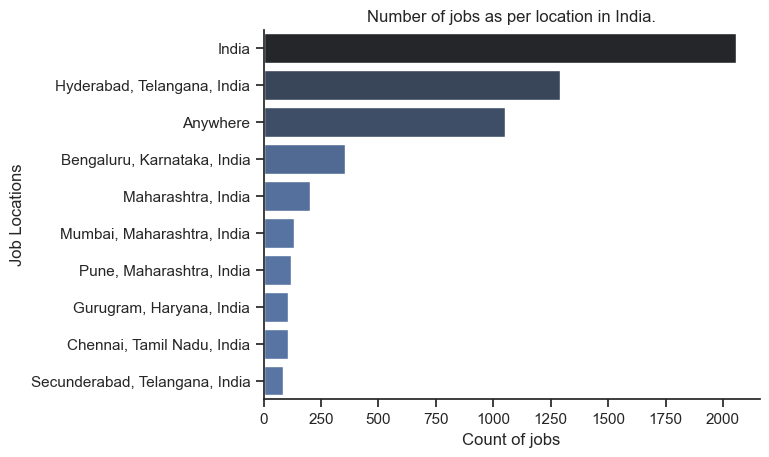

In [31]:
sns.set_theme(style="ticks")
sns.barplot(data=df_loaction_plot, y="job_location", x="count", hue="count", palette="dark:b_r", legend=False)
sns.despine() # to remove borders
plt.title("Number of jobs as per location in India.")
plt.xlabel("Count of jobs")
plt.ylabel("Job Locations")
# plt.tight_layout()
plt.show()

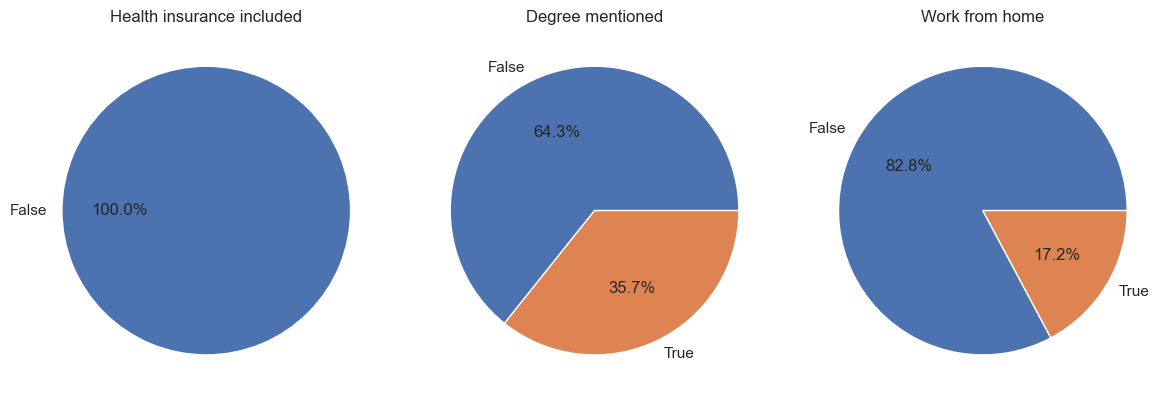

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
titles_dict = {
    "job_health_insurance": "Health insurance included",
    "job_no_degree_mention": "Degree mentioned",
    "job_work_from_home": "Work from home"
}

for i, (column, title) in enumerate(titles_dict.items()):
    value_counts = df_DA_India[column].value_counts()
    ax[i].pie(value_counts, autopct='%1.1f%%', labels=value_counts.index) # labels need to be in correct order or we will provide wrong data 
    ax[i].set_title(title)
    ax[i].set_ylabel("")
    
fig.tight_layout()


# dict_column.items() returns key-value pairs of the dictionary.
# column gets the key (column name).
# title gets the value (corresponding title).

In [40]:
df_company_plot = df_DA_India["company_name"].value_counts().head(10).to_frame()
df_company_plot

,count
company_name,
SAZ India,100
S&P Global,93
Confidential,82
Prometrics Solutions,72
PepsiCo,58
Maxgen Technologies Private Limited,57
JPMorgan Chase & Co.,53
JP Morgan Chase,51
Ovidtech Technologies,49


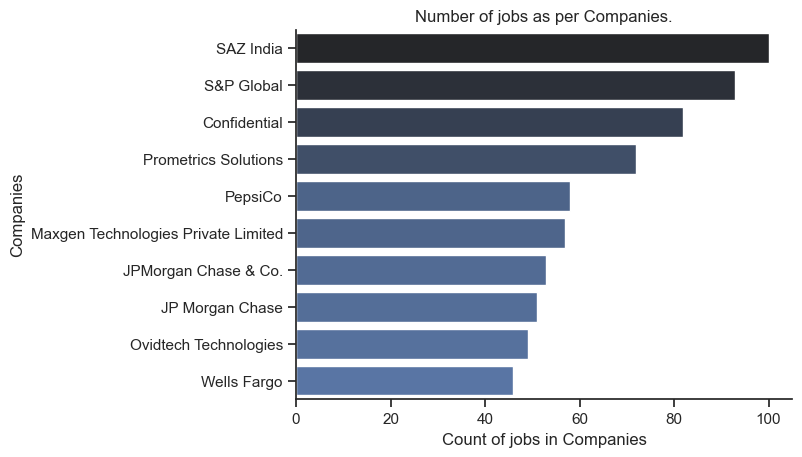

In [56]:
sns.set_theme(style="ticks")
sns.barplot(data=df_company_plot, y="company_name", x="count", hue="count", palette="dark:b_r", legend=False)
sns.despine() # to remove borders
plt.title("Number of jobs as per Companies.")
plt.xlabel("Count of jobs in Companies")
plt.ylabel("Companies")
# plt.tight_layout()
plt.show()